# EE 524 Machine Learning Lab: Assignment 6

- by Aikendrajit Roll no.: 206102002

**Support Vector Machine**: Since, not all machine learning problems are
binary classification problems, there are datasets where we have multiple classes.
Multi class classification can be seen in classifying handwritten MNIST digits,
multi class image classification and even the iris dataset.
1. Import the Dataset: Download the iris flower dataset and import the csv file.

2. Split the Dataset Split the dataset into 4 parts. Training data, Training
target, Test data and Test target. Split the data in such a way that the set
(Training Data, Training Target) has 75% of the total dataset and (Test
Data, Test Target) comprises of the rest of the dataset. Use scikit-learn
for this.
3. Training the SVM Train a SVM Classifier using scikit-learn. Train the
model using the Training Data and Training Target.
4. Testing the model Use the trained SVM Classifier to predict the labels
on the Test Data.
5. Performance of model Use the predicted labels from the previous part
and the Training Target to create a Confusion Matrix. A confusion matrix
is a way to check whether the model has performed well or not on different
cases.
6. Accuracy Report the accuracy of the model from the confusion matrix.
Also try the same procedure for the splitting ratio as 80% Train and 20%
Test Data.

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [104]:
#Reading data
df = pd.read_csv("iris.data")
#printing the first 5 data of iris dataset
df.head()

,SepalLength(Cm),SepalWidth(Cm),PetalLength(Cm),PetalWidth(Cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
df.describe()

,SepalLength(Cm),SepalWidth(Cm),PetalLength(Cm),PetalWidth(Cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [106]:
df.keys()

Index(['SepalLength(Cm)', 'SepalWidth(Cm)', 'PetalLength(Cm)',
       'PetalWidth(Cm)', 'Species'],
      dtype='object')

In [107]:
# Separating the independent variables from dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [108]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
pred = model.predict(X_test)
print(confusion_matrix(y_test,pred))

[[15  0  0]
 [ 0 10  0]
 [ 0  1 12]]


In [110]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



Principal Component Analysis and Linear Discriminant Analysis
This is one of the most important topics that one can encounter in a ML course.
This is a feature reduction technique. Many times we have data that has a large
number of features (1000's of them). It is not possible always to consider all
possible features and carry out the training. So we use a feature reduction
technique to make the same problem with less number of features. If we reduce
the features, will the model be ecient enough? The answer lies in the fact,
that we will choose features that are having the maximum variances.

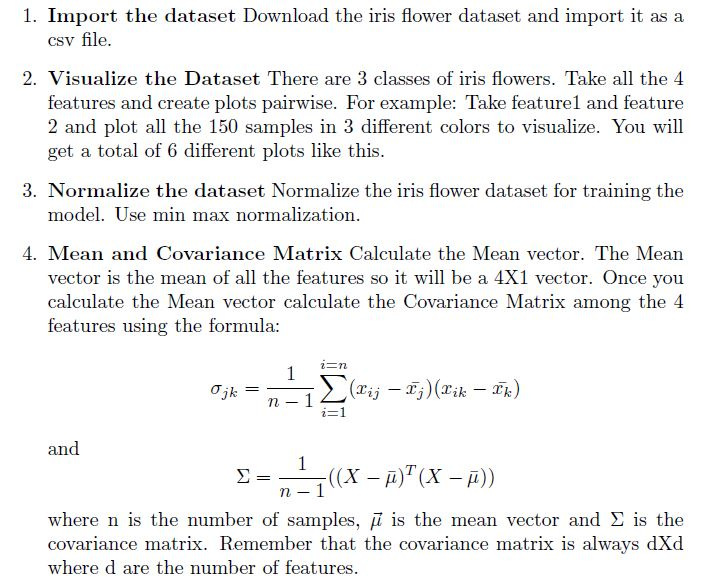

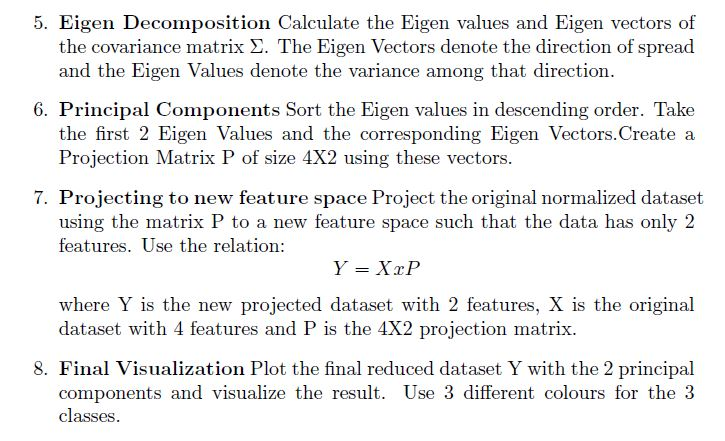

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [140]:
#Reading data
df = pd.read_csv("iris.data")
#printing the first 5 data of iris dataset
df.head()

,SepalLength(Cm),SepalWidth(Cm),PetalLength(Cm),PetalWidth(Cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
df.keys()

Index(['SepalLength(Cm)', 'SepalWidth(Cm)', 'PetalLength(Cm)',
       'PetalWidth(Cm)', 'Species'],
      dtype='object')

In [142]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

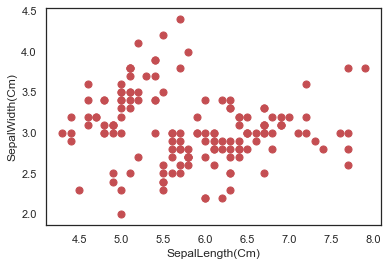

In [143]:
df.plot(kind="scatter", x="SepalLength(Cm)", y="SepalWidth(Cm)",color="r", s = 50)   #s = size of the data point
plt.show()

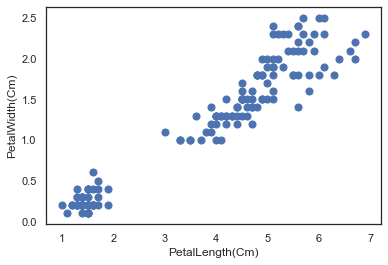

In [144]:
df.plot(kind="scatter", x="PetalLength(Cm)", y="PetalWidth(Cm)",color="b", s = 50)   #s = size of the data point
plt.show()

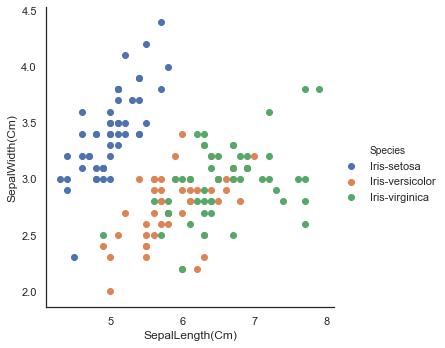

In [148]:
# Modifying the graph above by assigning each species an individual color.
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLength(Cm)", "SepalWidth(Cm)").add_legend()
plt.show()

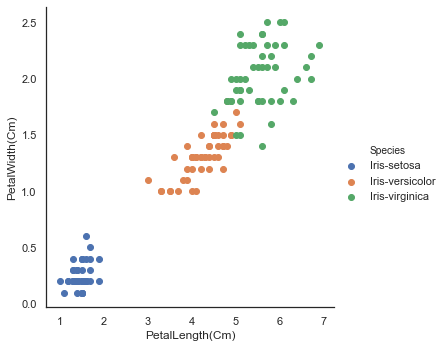

In [146]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "PetalLength(Cm)", "PetalWidth(Cm)").add_legend()
plt.show()